First of all, it is important to use the command `%matplotlib notebook` in order to interactive plot the figures. 

In [1]:
%matplotlib notebook

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp
sns.set(style="white", color_codes=True)

In [3]:
hepatitis_data = pd.read_csv("dataset_55_hepatitis.csv")

In [4]:
hepatitis_data.shape

(155, 20)

In [5]:
hepatitis_data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE


In [6]:
hepatitis_data.dtypes

AGE                 int64
SEX                object
STEROID            object
ANTIVIRALS         object
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER_BIG          object
LIVER_FIRM         object
SPLEEN_PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK_PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY          object
Class              object
dtype: object

In [7]:
replacements = {'no': 0,
               'yes': 1,
               'DIE': 0,
               'LIVE': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

hepatitis_data.replace(replacements, inplace = True)

In [8]:
hepatitis_data = hepatitis_data.astype(float)

In [9]:
total_of_patients = hepatitis_data.shape[0]
total_of_live_patients = (np.sum(hepatitis_data['Class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(hepatitis_data['Class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

('Living patients:', 0.0, '%')
('Dead patients:', 0.0, '%')


In [10]:
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT']
hepatitis_data[numerical_variables].describe()

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK_PHOSPHATE,SGOT
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [11]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
hepatitis_data[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


In [12]:
hepatitis_analysis = hepatitis_data.dropna()
interesting_values_x = ['ALBUMIN', 'ANOREXIA','ALK_PHOSPHATE', 'ASCITES', 'BILIRUBIN', 'PROTIME', 'SGOT', 'Class']
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()

,ALBUMIN,ANOREXIA,ALK_PHOSPHATE,ASCITES,BILIRUBIN,PROTIME,SGOT,Class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


<IPython.core.display.Javascript object>


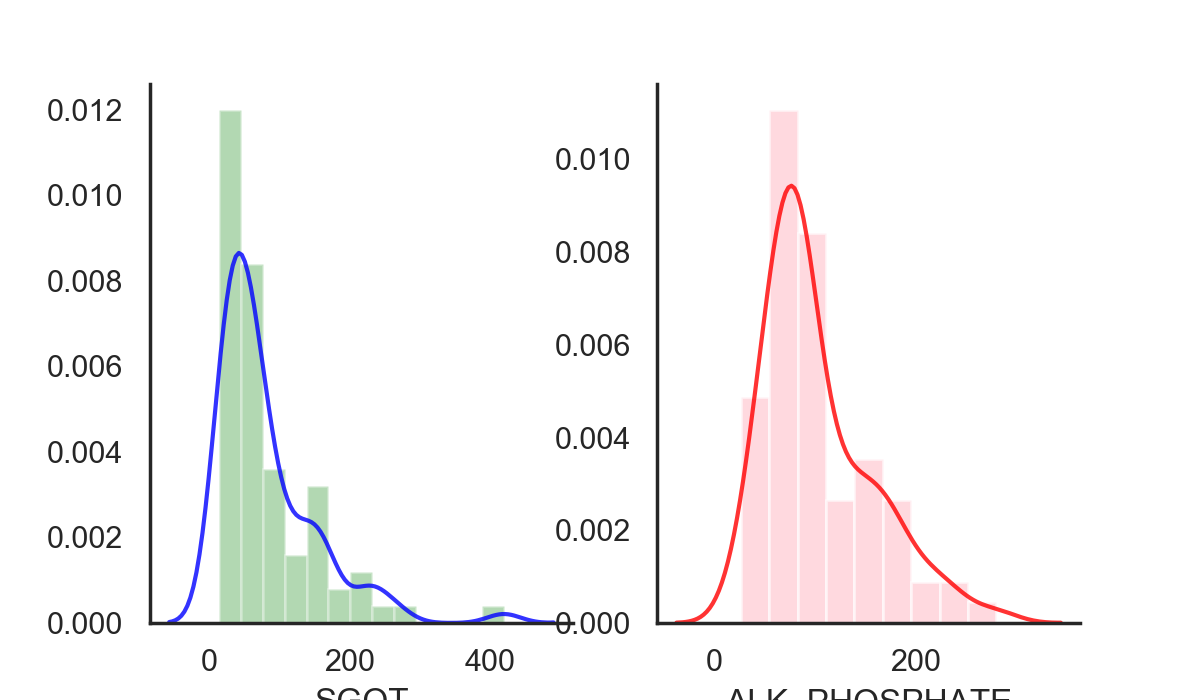

In [13]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['SGOT'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['ALK_PHOSPHATE'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})
sns.despine();

<IPython.core.display.Javascript object>


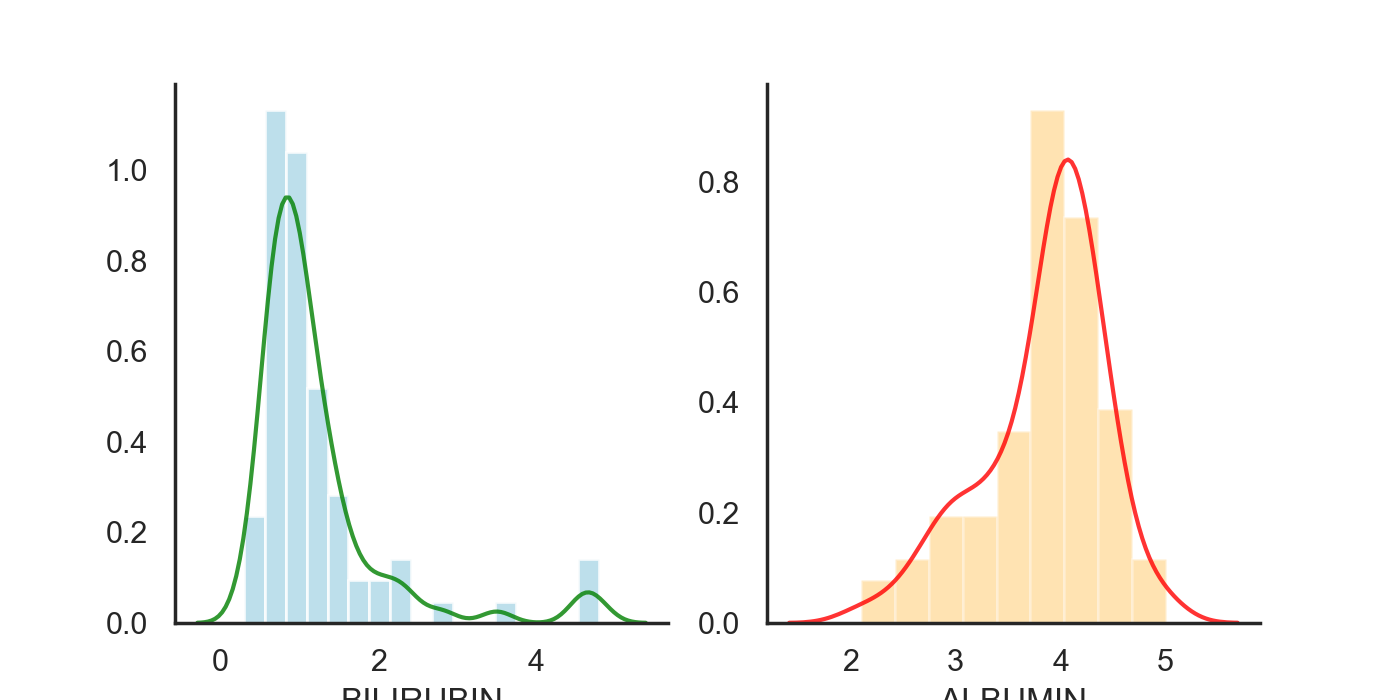

In [14]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['BILIRUBIN'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['ALBUMIN'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})
sns.despine();

<IPython.core.display.Javascript object>


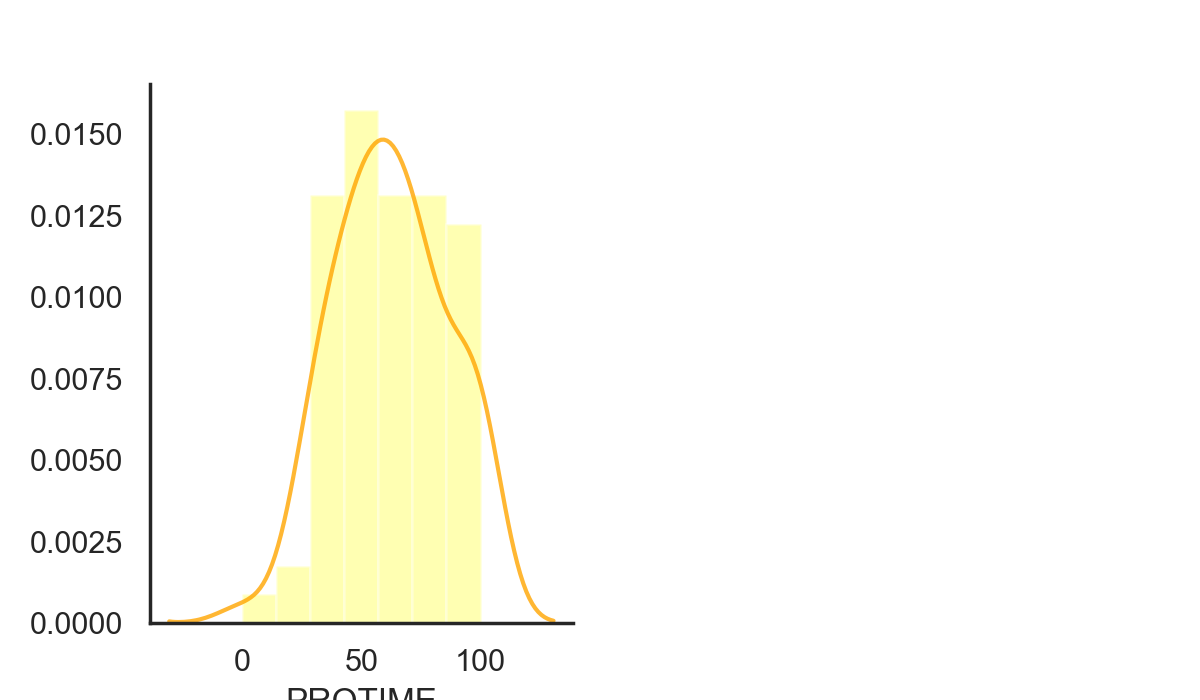

In [15]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['PROTIME'], 
             kde_kws={"color":"orange","lw":1.5,"alpha":0.8},
             hist_kws={"color":"yellow","alpha":0.3})
sns.despine();

In [16]:
hepatitis_analysis[['ALBUMIN', 'ALK_PHOSPHATE', 'BILIRUBIN', 'SGOT']] = hepatitis_analysis[['ALBUMIN','ALK_PHOSPHATE', 'BILIRUBIN', 'SGOT']].applymap(np.log)
hepatitis_analysis.head()

,ALBUMIN,ANOREXIA,ALK_PHOSPHATE,ASCITES,BILIRUBIN,PROTIME,SGOT,Class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


/opt/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


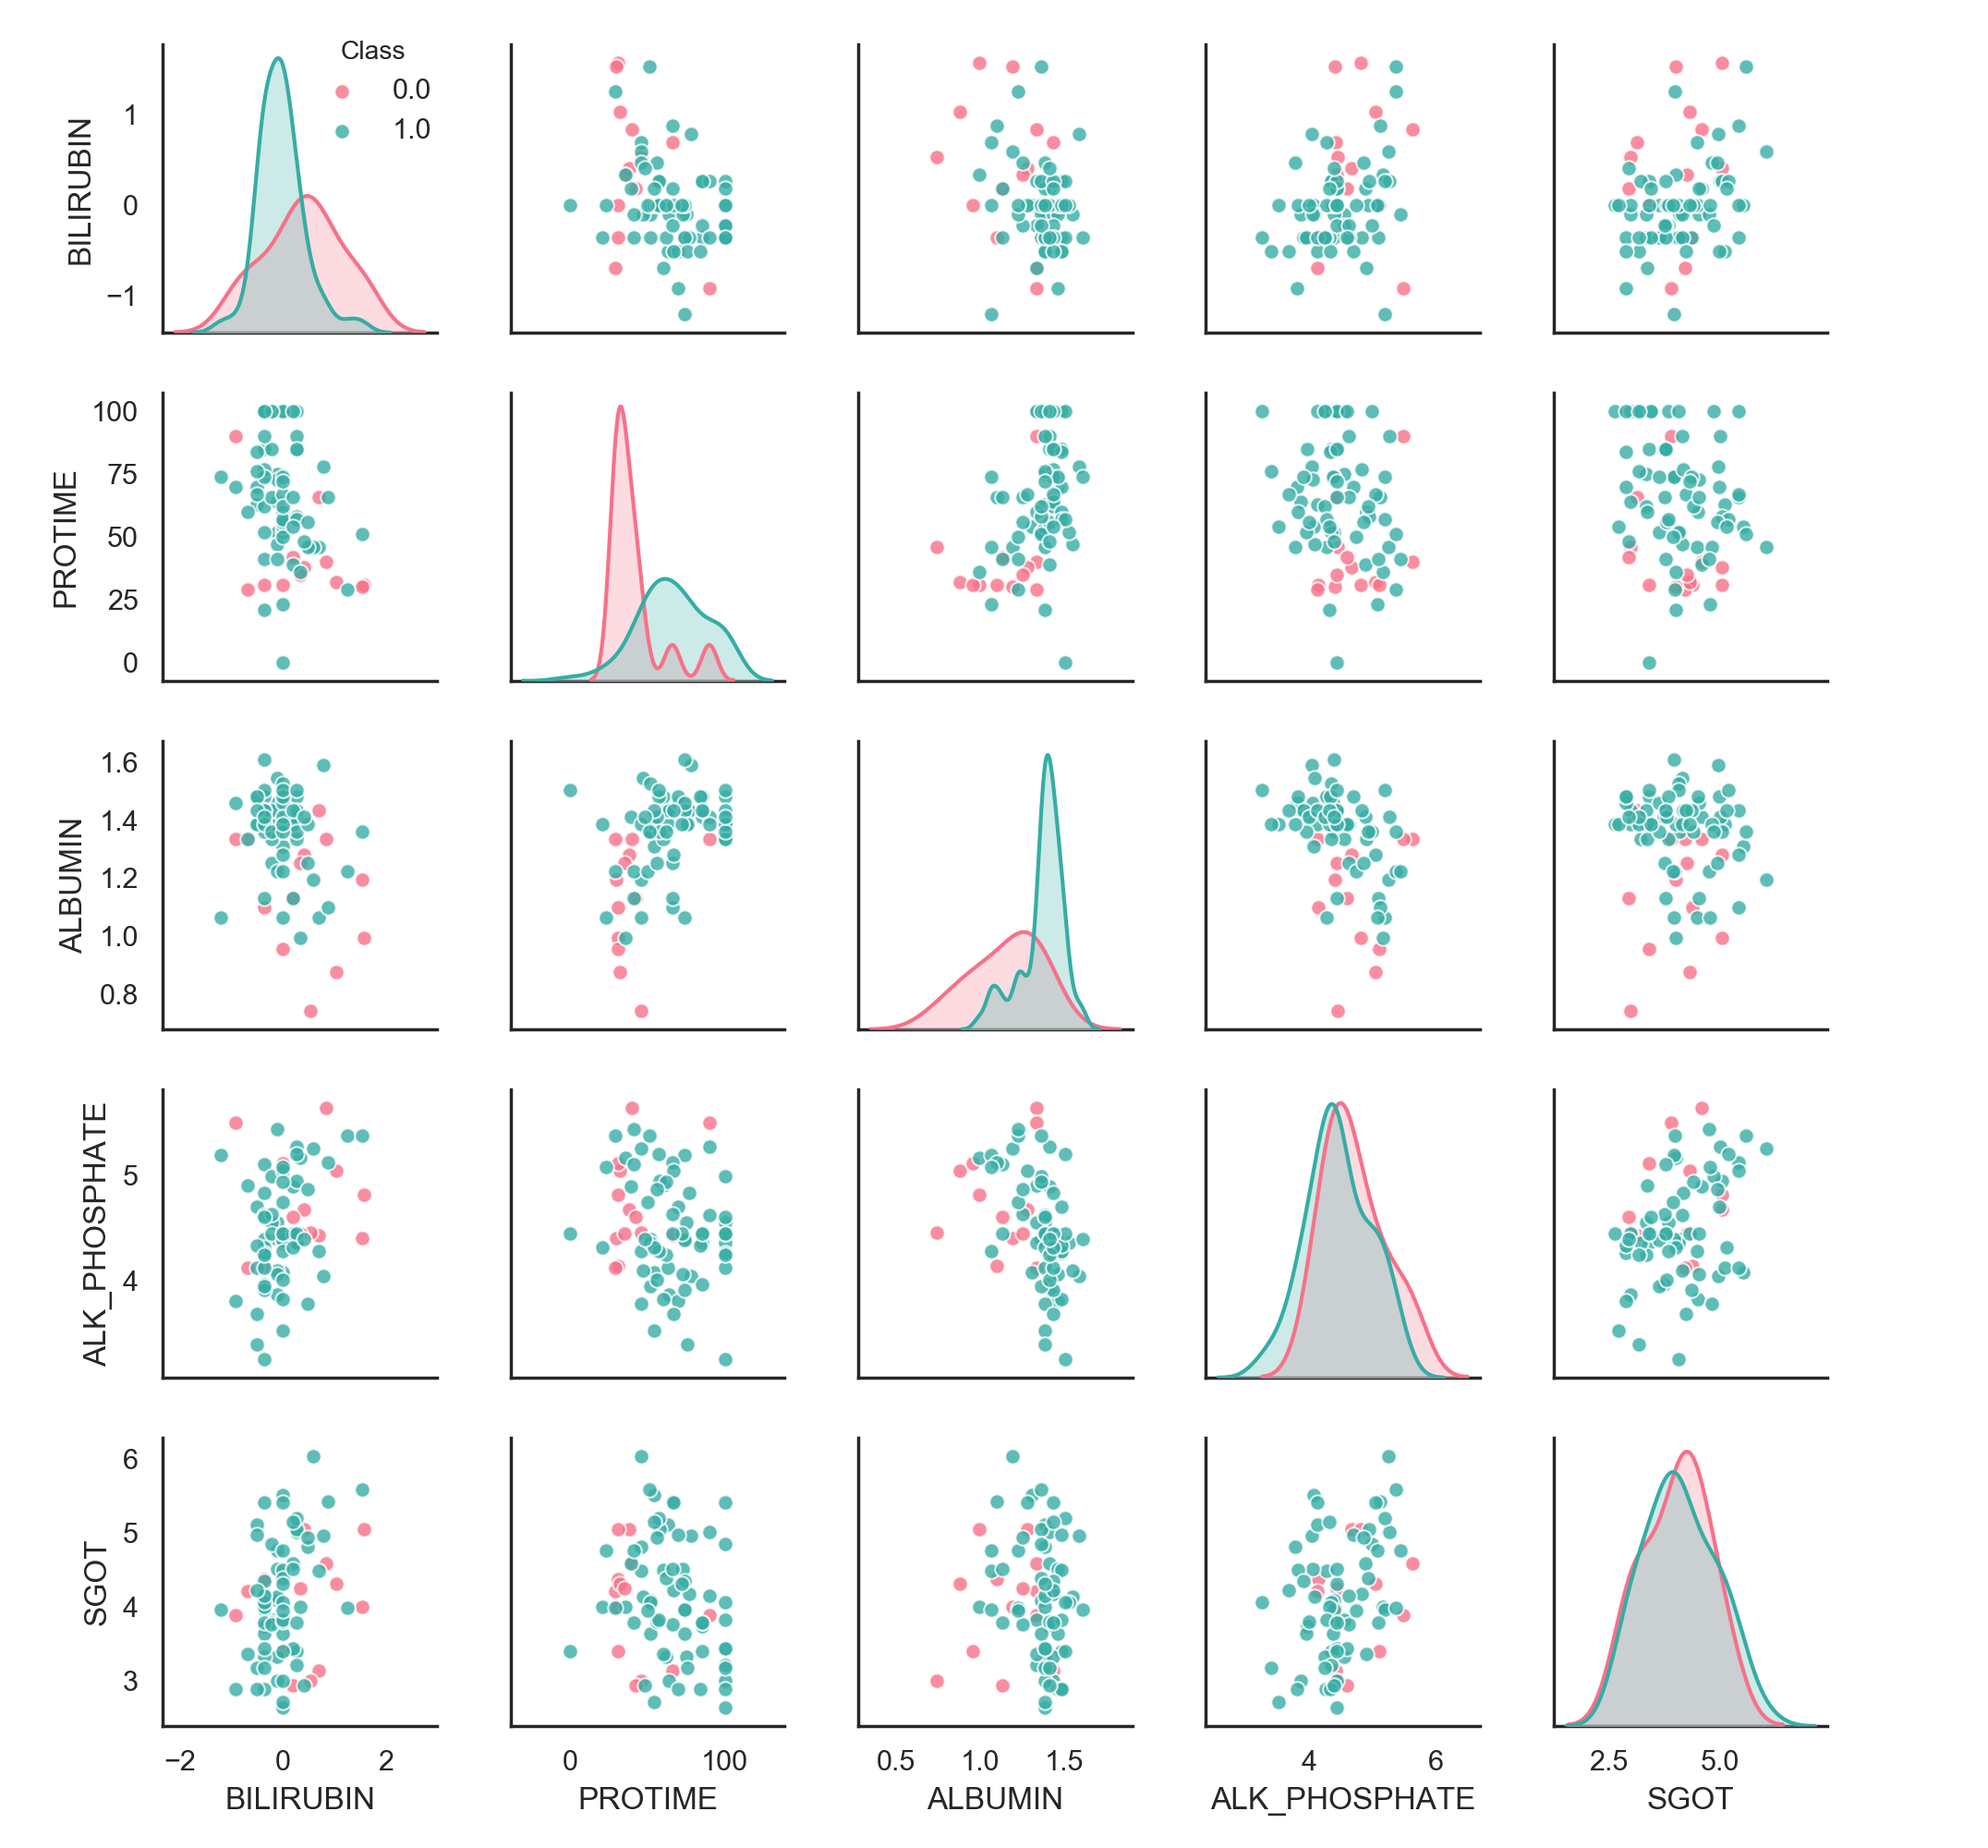

In [17]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'], 
               y_vars = ['BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'], 
               hue = 'Class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));


<IPython.core.display.Javascript object>


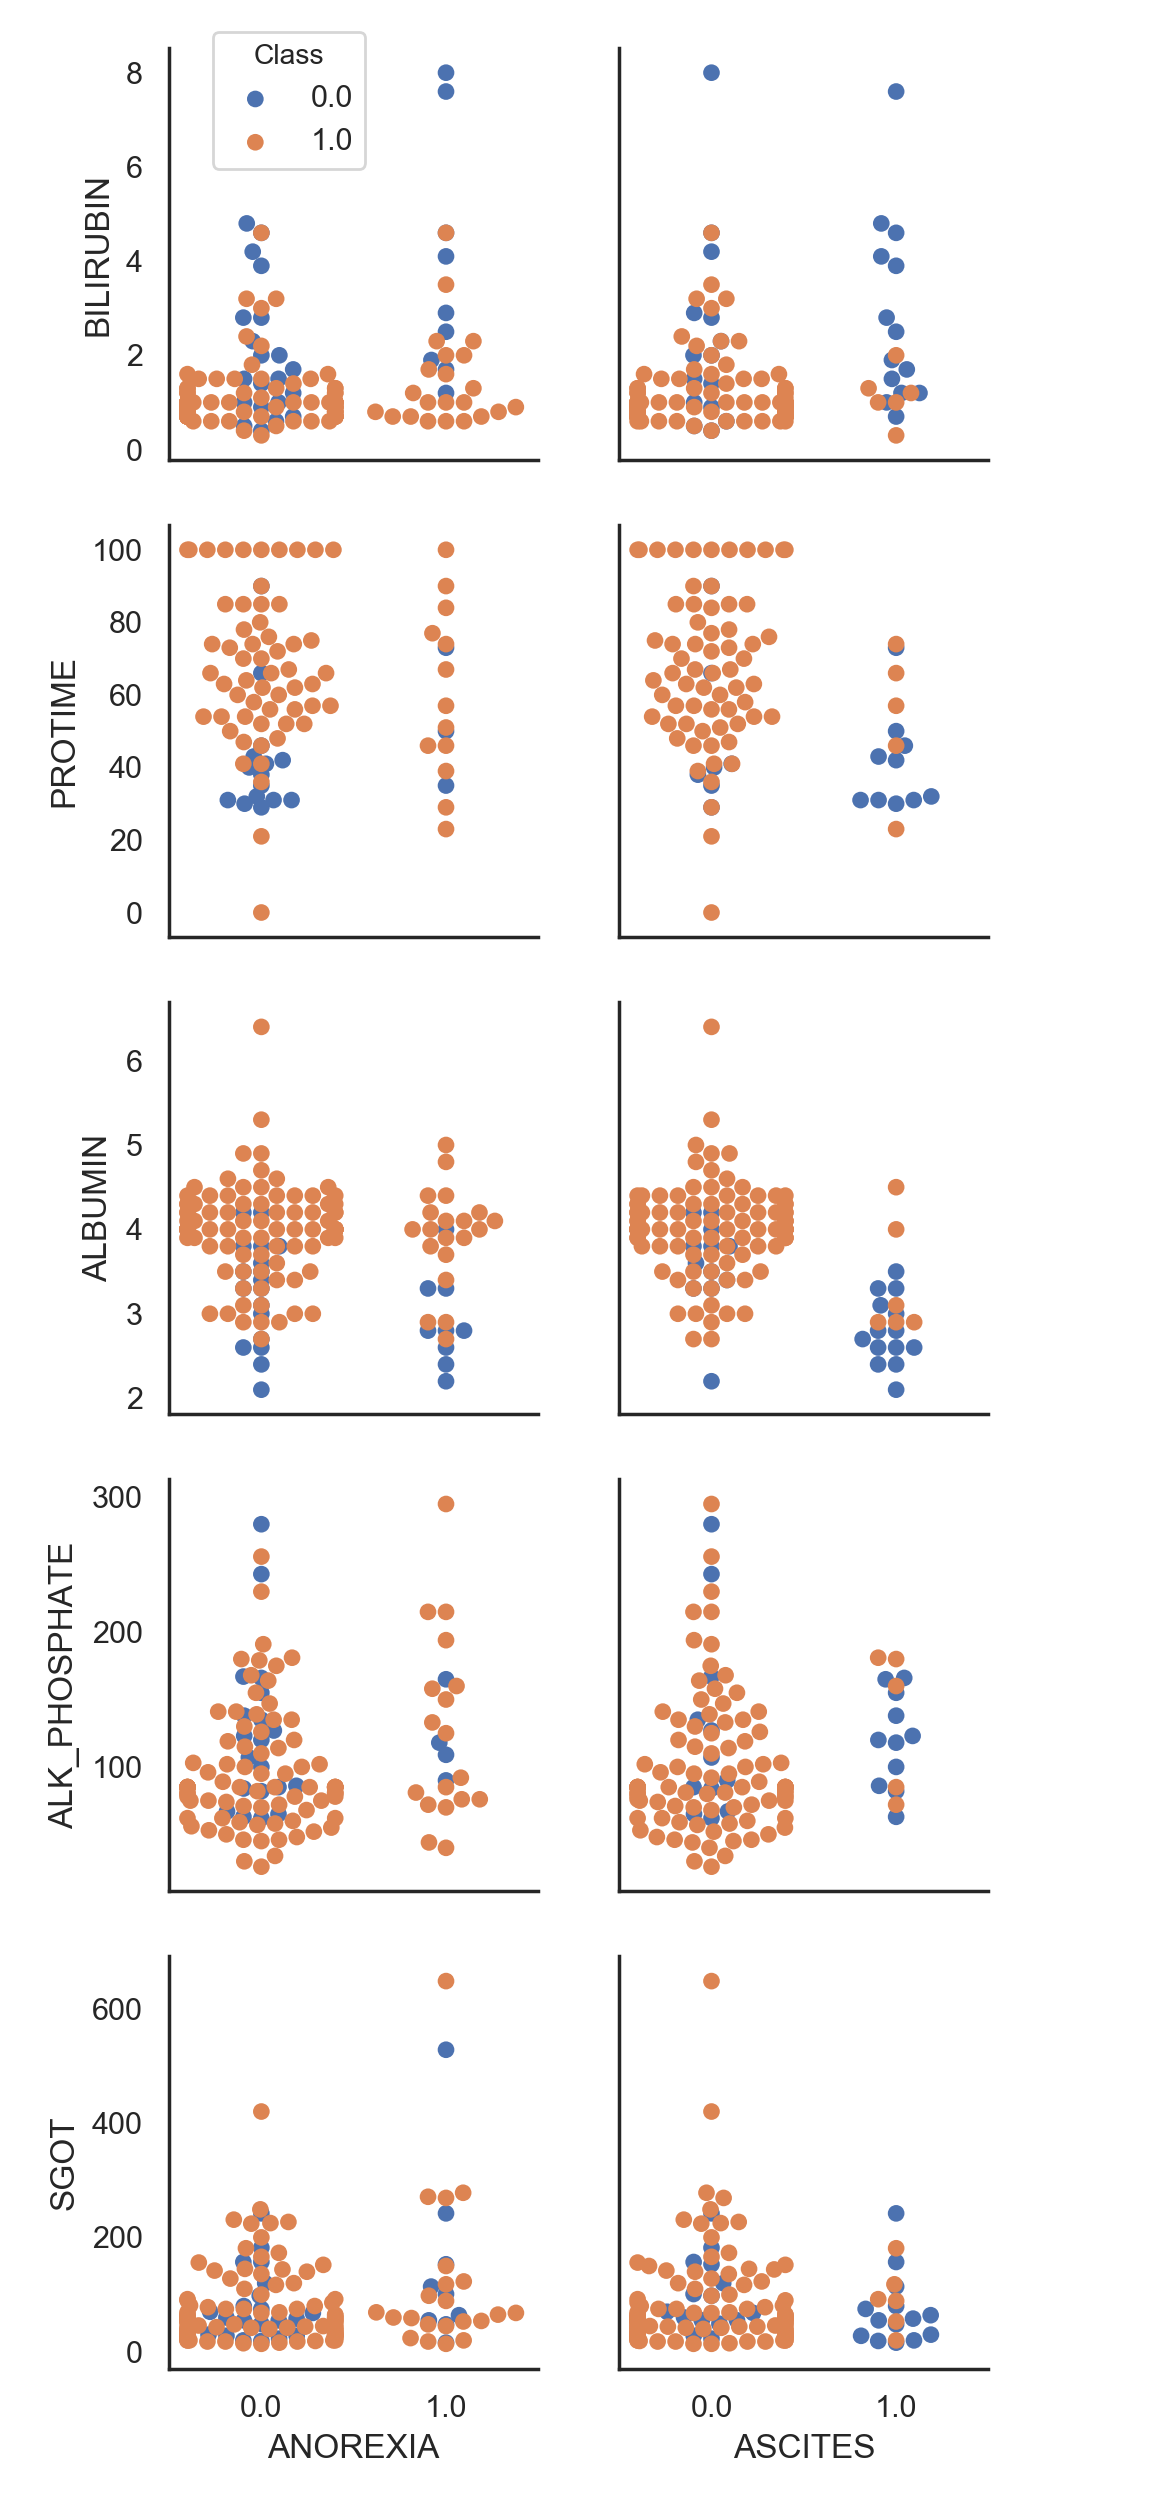

In [18]:
graph = sns.PairGrid(hepatitis_data,
                 x_vars=["ANOREXIA", "ASCITES"],
                 y_vars=['BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'],
                 hue = 'Class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

In [19]:
hepatitis_data[categorical_variables] = hepatitis_data[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [20]:
corr = hepatitis_data.dropna().corr(method = 'pearson')

<IPython.core.display.Javascript object>


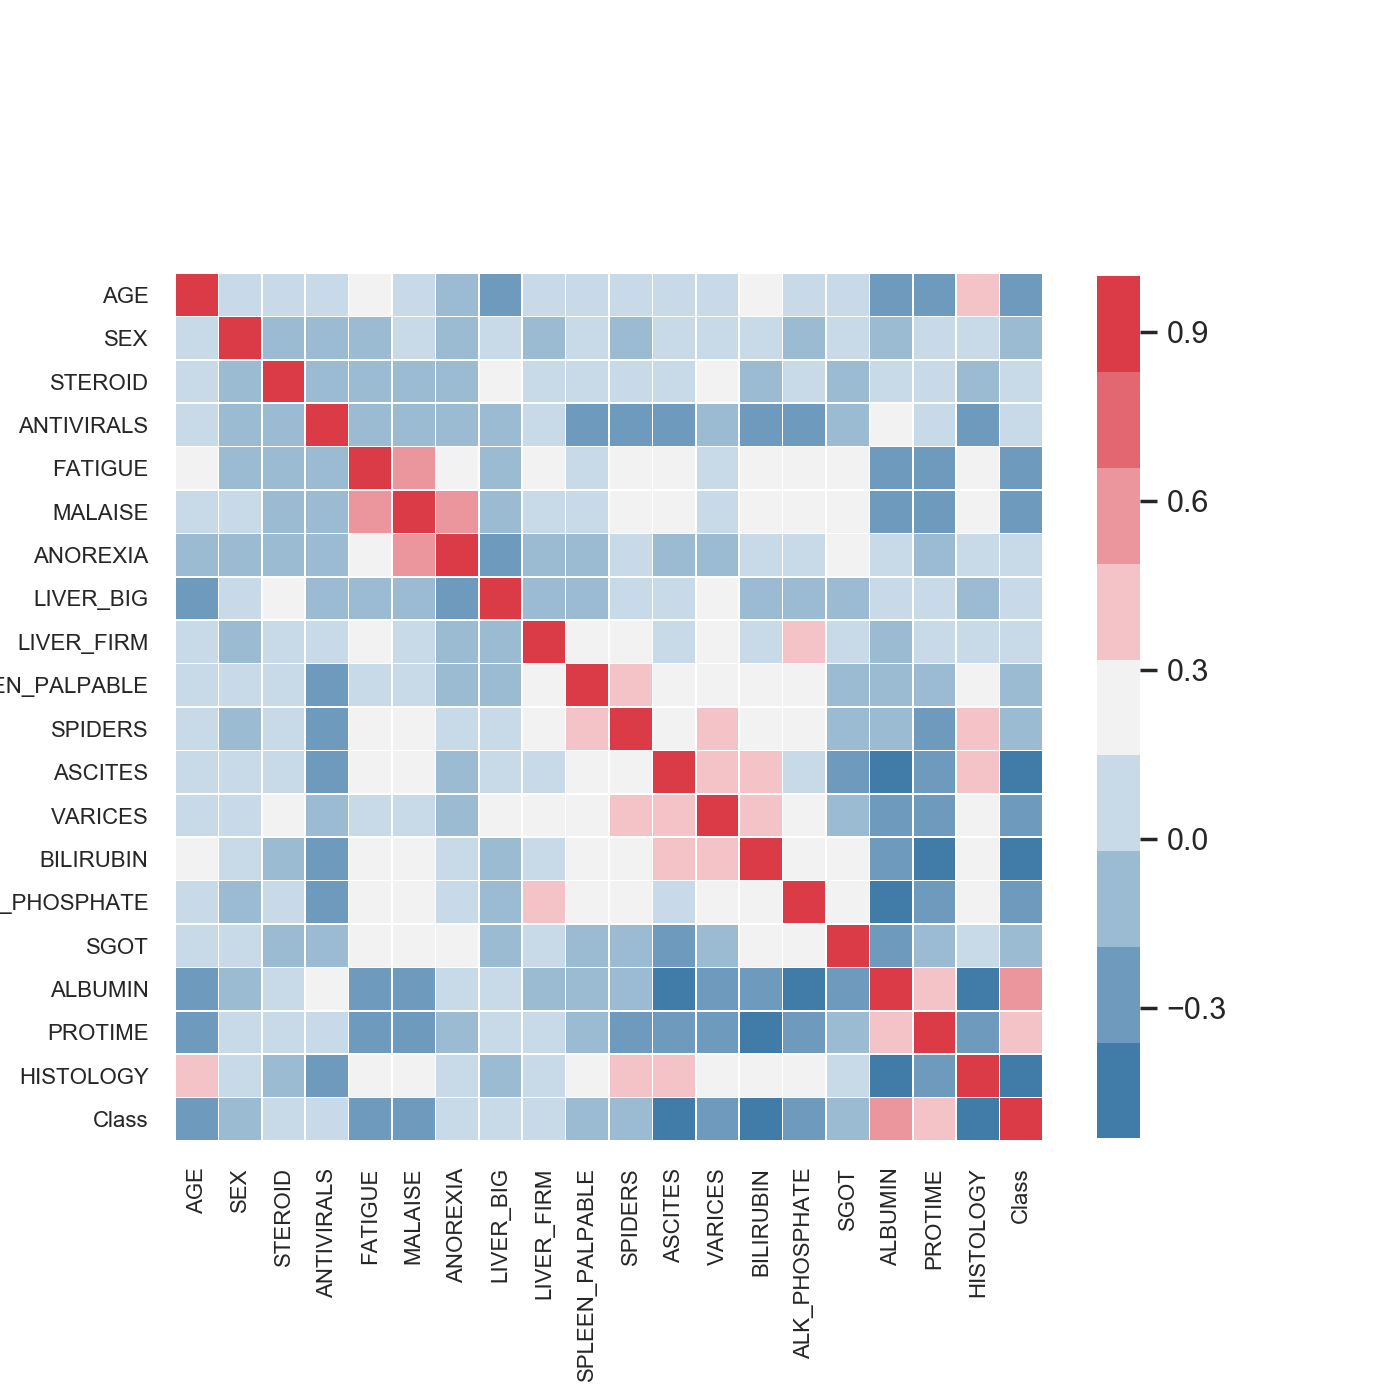

In [21]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);